In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize, MultiLabelBinarizer

In [19]:
dev = pd.read_csv('data_clean.csv')
dev.head()

,Unnamed: 0,X.ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Var1,Approved
0,1,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4,2000.0,B001,P,N,S122,G,0.0,0,0
1,2,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1,3500.0,B002,P,Y,S122,G,0.0,10,0
2,3,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4,2250.0,B003,G,Y,S143,B,0.0,0,0
3,4,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4,3500.0,B003,G,Y,S143,B,0.0,7,0
4,5,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4,10000.0,B001,P,Y,S134,B,2500.0,10,0


In [20]:
dev = dev.dropna()

In [157]:
dev.shape

(59546, 13)

## Data exploration

In [21]:
np.count_nonzero(dev['Approved'])
# 991 '1' exist 

991

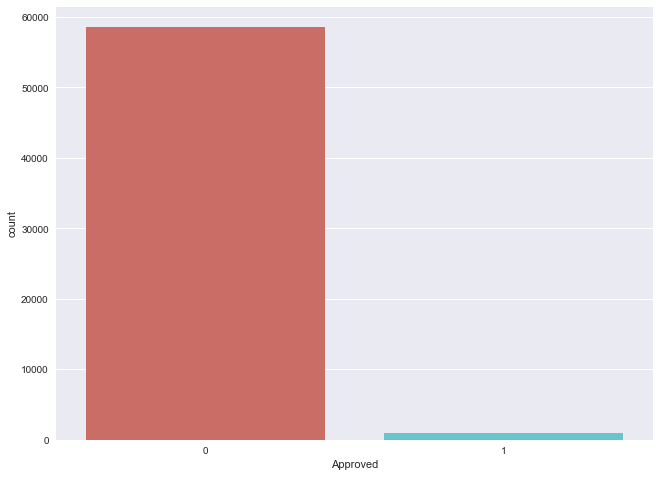

In [22]:
import seaborn as snb
import matplotlib.pyplot as plt
snb.countplot(x='Approved', data= dev, palette = 'hls')
plt.show()

In [23]:
dev.groupby('Approved').mean()
# average montly income of conversiable customers HIGHER than NONE- conversible and Existing_EMI, var1 are also higher

,Unnamed: 0,Employer_Category2,Monthly_Income,Existing_EMI,Var1
Approved,,,,,
0,33527.668722,3.703356,5600.020164,371.986791,4.237213
1,33850.778002,3.592331,6340.305247,894.491221,7.486377


In [24]:
dev.groupby('Source').mean()

,Unnamed: 0,Employer_Category2,Monthly_Income,Existing_EMI,Var1,Approved
Source,,,,,,
S122,51295.784028,3.663922,6698.424176,374.603262,4.207322,0.018638
S123,14702.862069,3.793103,3982.168966,431.513793,6.137931,0.000000
S124,15203.428571,3.785714,4590.685714,1708.992857,3.000000,0.000000
S127,26248.164897,3.767870,7226.225973,330.817481,3.702052,0.008493
S129,19077.333333,4.000000,4300.000000,673.333333,4.666667,0.000000
S130,21361.000000,1.000000,2500.000000,0.000000,7.000000,0.000000
S133,19858.401896,3.723331,4171.649764,392.767673,4.314133,0.017280
S134,22239.912155,3.734423,4301.798366,361.034934,4.811032,0.039837
S135,42457.500000,2.500000,20700.000000,3500.000000,10.000000,0.000000


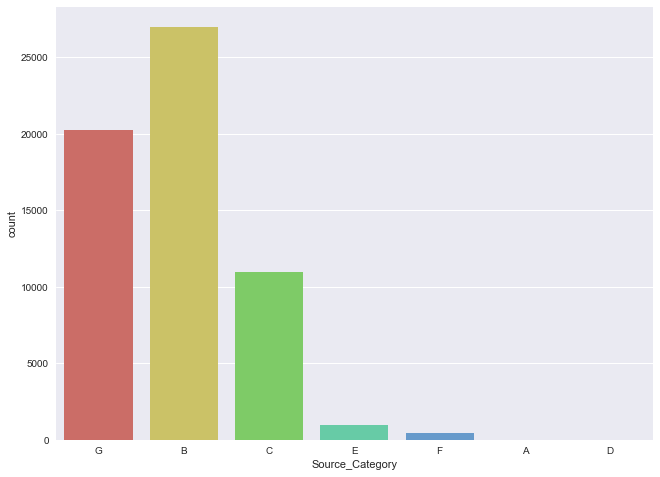

In [25]:
snb.countplot(x='Source_Category', data= dev, palette = 'hls')
snb.set_style('ticks')
snb.set(rc={'figure.figsize':(10.7,7.97)})
plt.show()
# more observations belongs to sourcess s122 and s133

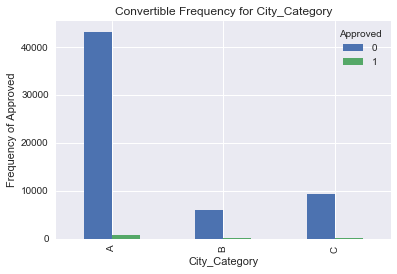

In [26]:
%matplotlib inline
pd.crosstab(dev.City_Category,dev.Approved).plot(kind='bar')
plt.title('Convertible Frequency for City_Category')
plt.xlabel('City_Category')
plt.ylabel('Frequency of Approved')
snb.set(rc={'figure.figsize':(10.7,7.97)})

# A large number of customers belong to City_Cateogy A while, percentage of convertible is very low compared to other categories

Text(0,0.5,'Frequency of Employer_Category')

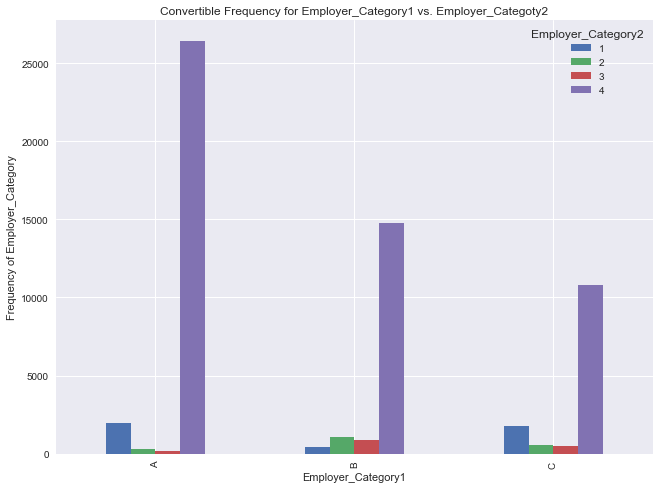

In [27]:
pd.crosstab(dev.Employer_Category1,dev.Employer_Category2).plot(kind='bar')
plt.title('Convertible Frequency for Employer_Category1 vs. Employer_Categoty2')
plt.xlabel('Employer_Category1')
plt.ylabel('Frequency of Employer_Category')

# Each Employer_category has good shares of Employer_Category2 

Text(0,0.5,'Frequency of Approved')

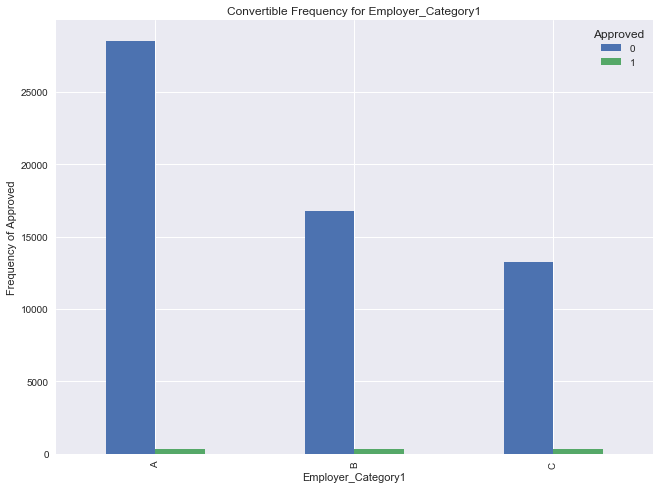

In [28]:
pd.crosstab(dev.Employer_Category1,dev.Approved).plot(kind='bar')
plt.title('Convertible Frequency for Employer_Category1')
plt.xlabel('Employer_Category1')
plt.ylabel('Frequency of Approved')
#snb.set(rc={'figure.figsize':(10.7,7.97)})

# Each Employer_Category 1 has good share of convertible cutomers

Text(0,0.5,'Frequency of Approved')

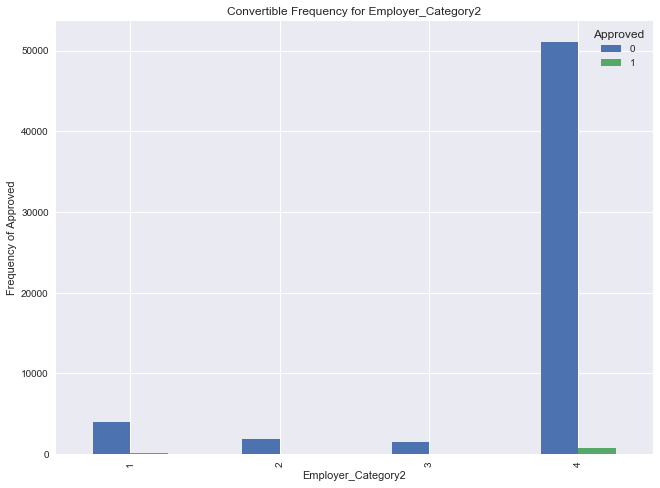

In [29]:
pd.crosstab(dev.Employer_Category2,dev.Approved).plot(kind='bar')
plt.title('Convertible Frequency for Employer_Category2')
plt.xlabel('Employer_Category2')
plt.ylabel('Frequency of Approved')
#snb.set(rc={'figure.figsize':(10.7,7.97)})

    # Majority of convertible customers belong to Employer_Category 2

Text(0,0.5,'Frequency of Approved')

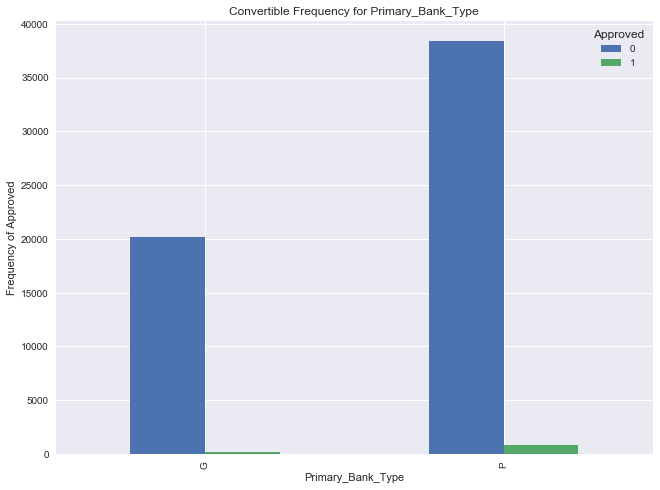

In [30]:
pd.crosstab(dev.Primary_Bank_Type,dev.Approved).plot(kind='bar')
plt.title('Convertible Frequency for Primary_Bank_Type')
plt.xlabel('Primary_Bank_Type')
plt.ylabel('Frequency of Approved')
#snb.set(rc={'figure.figsize':(10.7,7.97)})

# Most of the customers have 'P' as primary_bank_type and each bank has good shares of convertible customers

Text(0,0.5,'Frequency of Approved')

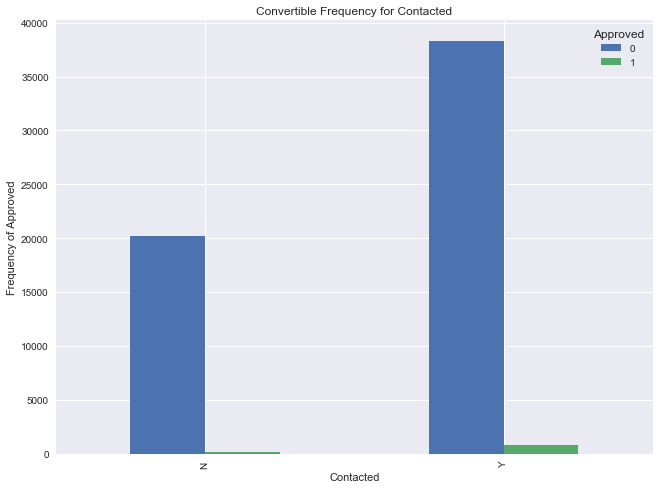

In [31]:
pd.crosstab(dev.Contacted,dev.Approved).plot(kind='bar')
plt.title('Convertible Frequency for Contacted')
plt.xlabel('Contacted')
plt.ylabel('Frequency of Approved')
#snb.set(rc={'figure.figsize':(10.7,7.97)})

In [32]:
print('Total Number of customers is {}'.format(len(dev)))
x = dev[dev.Contacted=='Y']
print('Percentage of customers who were contacted and are converted is {}'.format(len(x[x.Approved==1])/len(dev)))
print('Percentage of customers who were contacted and are NOT converted is {}'.format(len(x[x.Approved==0])/len(dev)))
y = dev[dev.Contacted == 'N']
print('Percentage of customers who were NOT contacted and are converted is {}'.format(len(y[y.Approved==1])/len(dev)))
print('Percentage of customers who were NOT contacted and are NOT converted is {}'.format(len(y[y.Approved==0])/len(dev)))

Total Number of customers is 59546
Percentage of customers who were contacted and are converted is 0.013821247438954758
Percentage of customers who were contacted and are NOT converted is 0.6434521210492729
Percentage of customers who were NOT contacted and are converted is 0.0028213482013905214
Percentage of customers who were NOT contacted and are NOT converted is 0.3399052833103819


In [33]:
dev = dev.drop_duplicates()
dev = dev.drop(['DOB'], axis = 1)
dev = dev.drop(['Lead_Creation_Date'], axis = 1)
dev = dev.drop(['City_Category'], axis = 1)
dev = dev.drop(['Employer_Code'], axis = 1)
dev = dev.drop(['Customer_Existing_Primary_Bank_Code'], axis = 1)
dev = dev.drop(['City_Code'], axis = 1)
#dev = dev.drop(['Source'], axis = 1)
#df_with_dummies = df_with_dummies.drop(['Unnamed: 0'], axis = 1)

In [34]:
dev['Gender'] = label_binarize(dev['Gender'], classes = [0,1])
dev['Contacted'] = label_binarize(dev['Contacted'], classes=[0,1])
dev['Employer_Category1'] = label_binarize(dev['Employer_Category1'], classes=[0,1,2])
dev['Primary_Bank_Type'] = label_binarize(dev['Primary_Bank_Type'], classes=[0,1])
dev['Source_Category'] = label_binarize(dev['Source_Category'], classes=[0,1,2,3,4,5,6])

In [35]:
#df_with_dummies = pd.get_dummies( data = dev, columns = ['Employer_Category1','Primary_Bank_Type','Source_Category']  )

In [38]:

#df_with_dummies['City_Code'] = df_with_dummies['City_Code'].str.replace('C', '')
#df_with_dummies['Employer_Code'] = df_with_dummies['Employer_Code'].str.replace('COM', '')
#df_with_dummies['Customer_Existing_Primary_Bank_Code'] = df_with_dummies['Customer_Existing_Primary_Bank_Code'].str.replace('B', '')
df_with_dummies = dev
df_with_dummies['Source'] = df_with_dummies['Source'].str.replace('S', '')

In [39]:
df_with_dummies['Gender'] = df_with_dummies['Gender'].astype('object')
df_with_dummies['Employer_Category2'] = df_with_dummies['Employer_Category2'].astype('object')
df_with_dummies['Contacted'] = df_with_dummies['Contacted'].astype('object')
df_with_dummies['Var1'] = df_with_dummies['Var1'].astype('object')
df_with_dummies['Primary_Bank_Type'] = df_with_dummies['Primary_Bank_Type'].astype('object')
df_with_dummies['Employer_Category1'] = df_with_dummies['Employer_Category1'].astype('object')
df_with_dummies['Source_Category'] = df_with_dummies['Source_Category'].astype('object')
df_with_dummies['Source'] = df_with_dummies['Source'].astype('object')

In [40]:
from sklearn.preprocessing import  StandardScaler
Scale = StandardScaler()
df_with_dummies[['Monthly_Income', 'Existing_EMI']] = Scale.fit_transform(df_with_dummies[['Monthly_Income','Existing_EMI']])

In [41]:
df_with_dummies.head()

,Unnamed: 0,X.ID,Gender,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Var1,Approved
0,1,APPC90493171225,0,0,4,-0.020030,0,0,122,0,-0.370220,0,0
1,2,APPD40611263344,0,0,1,-0.011713,0,0,122,0,-0.370220,10,0
2,3,APPE70289249423,0,0,4,-0.018644,0,0,143,0,-0.370220,0,0
3,4,APPF80273865537,0,0,4,-0.011713,0,0,143,0,-0.370220,7,0
4,5,APPG60994436641,0,0,4,0.024329,0,0,134,0,2.061068,10,0


In [42]:
# correlation matrix
df_with_dummies.drop(['Unnamed: 0','X.ID','Approved'], axis =1).corr()
# Features doesn't seems to be correlated

,Monthly_Income,Existing_EMI
Monthly_Income,1.000000,0.019751
Existing_EMI,0.019751,1.000000


In [43]:
from sklearn.model_selection import train_test_split

In [51]:
trainx, testx, trainy, testy = train_test_split(df_with_dummies.drop(['Approved'], axis =1), df_with_dummies['Approved'], test_size = 0.20, stratify = df_with_dummies['Approved'], random_state = 0)

In [53]:
# With under sampling
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn import decomposition
# Create a pipeline
pipeline = make_pipeline(RandomUnderSampler(),
                         decomposition.PCA(),
                         LogisticRegression(),
                        )
pipeline.fit(trainx.drop(['Unnamed: 0','X.ID'], axis =1), trainy)
print("Train Accuracy: %.6f" % (accuracy_score(trainy, pipeline.predict(trainx.drop(['Unnamed: 0','X.ID'], axis =1)) )))
pred_y = pipeline.predict(testx.drop(['Unnamed: 0','X.ID'], axis =1))
print("Test Accuracy: %.6f" % (accuracy_score(testy, pred_y )))


Train Accuracy: 0.678164
Test Accuracy: 0.673132


In [54]:
# With Under sampling and cross validation
from sklearn.model_selection import cross_val_score
from sklearn import  model_selection
fold = 100
kfold = model_selection.KFold(n_splits=fold, random_state=7)
scoring = 'accuracy'
results = cross_val_score(pipeline, trainx.drop(['Unnamed: 0','X.ID'], axis =1), trainy, cv=kfold, scoring=scoring)
print("{}-fold cross validation average accuracy: {:.6f}".format (fold,results.mean()))
###### As cross validation result is close to testing score, model is not overfitted

100-fold cross validation average accuracy: 0.674783


### Confusion matrix, f1 score, precision and recall

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testy, pred_y )
# Pred_y -> holds prediction of test_X features
# The result is telling us that we have 4077+1779 correct predictions and 33+66 incorrect predictions.

array([[7872, 3840],
       [  53,  145]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(testy, pred_y))
# Interpretation:
# 98% of negative samples are not identified as positive (precision)
# 70% of positive samples are correctly identified (recall)
# Weighted average of precision and recall is 81% (f1-score)

             precision    recall  f1-score   support

          0       0.99      0.67      0.80     11712
          1       0.04      0.73      0.07       198

avg / total       0.98      0.67      0.79     11910



# Predition on test data

### Read test data and clean it

In [158]:
test = pd.read_csv('test_clean.csv')
test = test.dropna()
test = test.drop_duplicates()
test = test.drop_duplicates()
test = test.drop(['DOB'], axis = 1)
test = test.drop(['Lead_Creation_Date'], axis = 1)
test = test.drop(['City_Category'], axis = 1)
test = test.drop(['Employer_Code'], axis = 1)
test = test.drop(['Customer_Existing_Primary_Bank_Code'], axis = 1)
test = test.drop(['City_Code'], axis = 1)

test['Gender'] = label_binarize(test['Gender'], classes = [0,1])
test['Contacted'] = label_binarize(test['Contacted'], classes=[0,1])
test['Employer_Category1'] = label_binarize(test['Employer_Category1'], classes=[0,1,2])
test['Primary_Bank_Type'] = label_binarize(test['Primary_Bank_Type'], classes=[0,1])
test['Source_Category'] = label_binarize(test['Source_Category'], classes=[0,1,2,3,4,5,6])


test['Source'] = test['Source'].str.replace('S', '')

test['Gender'] = test['Gender'].astype('object')
test['Employer_Category2'] = test['Employer_Category2'].astype('object')
test['Contacted'] = test['Contacted'].astype('object')
test['Var1'] = test['Var1'].astype('object')
test['Primary_Bank_Type'] = test['Primary_Bank_Type'].astype('object')
test['Employer_Category1'] = test['Employer_Category1'].astype('object')
test['Source_Category'] = test['Source_Category'].astype('object')
test['Source'] = test['Source'].astype('object')

from sklearn.preprocessing import  StandardScaler
Scale = StandardScaler()
test[['Monthly_Income', 'Existing_EMI']] = Scale.fit_transform(test[['Monthly_Income','Existing_EMI']])
test.shape

(25707, 12)

### Testing

In [172]:
predicted_Y = pipeline.predict(test.drop(['Unnamed: 0','X.ID'], axis =1))

In [173]:
predicted_Y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [174]:
pred_proba = pipeline.predict_proba(test.drop(['Unnamed: 0','X.ID'], axis =1))
# Gives likelihood of being in class 0 to likelihood of being in class 1

In [175]:
pred_proba[:,1] # Likelihood of being in class 1

array([ 0.35244655,  0.48442731,  0.13870228, ...,  0.19409306,
        0.65986713,  0.25111273])

In [176]:
pred_proba[:,0] # Likelihood of being in class 0

array([ 0.64755345,  0.51557269,  0.86129772, ...,  0.80590694,
        0.34013287,  0.74888727])

In [177]:
# Append predicted values to the dataFrame
test['Approved']= predicted_Y
test['Class_1_Score'] = pred_proba[:,1]
test['Class_0_Score'] = pred_proba[:,0]

In [167]:
print('Percentage of customers to convert {}'.format(len(predicted_Y [predicted_Y == 1])/len(predicted_Y)))

Percentage of customers to convert 0.33352783288598437


In [181]:
print('Percentage of customers with higher than 90% probability of converion {}'.format(len(test[(test['Approved']==1 ) & (test['Class_1_Score']>.9)])/len(test)))

Percentage of customers with higher than 90% probability of converion 0.012409071459135643


In [134]:
test.head()

,Unnamed: 0,X.ID,Gender,Employer_Category1,Employer_Category2,Monthly_Income,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Var1,Class_1_Score,Class_0_Score,Approved
0,1,APPA70109647212,0,0,4,-0.077183,0,0,122,0,-0.371870,4,0.352447,0.647553,0
1,2,APPB10687939341,0,0,4,0.005733,0,0,133,0,-0.371870,7,0.484427,0.515573,0
2,3,APPC80449411414,0,0,4,-0.123697,0,0,133,0,-0.371870,0,0.138702,0.861298,0
3,4,APPD30665094501,0,0,3,-0.104889,0,0,133,0,-0.371870,0,0.139099,0.860901,0
4,5,APPE80379821637,0,0,4,-0.069498,0,0,143,0,0.127867,0,0.148327,0.851673,0


In [149]:
# Segregate customers with high probability of conversion
convertible_customer = test[(test['Approved'] == 1) & (test['Class_1_Score']> 0.9)]

In [151]:
# Export data to csv file
convertible_customer.to_csv('convertible_customer.csv')